In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import (classification_report, average_precision_score, matthews_corrcoef,
                          accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score,
                          confusion_matrix, cohen_kappa_score)

from numpy.random import RandomState
import random


N_ROUND = 5
N_SAMPLES = 10000
N_MIN_SAMPLES = 0
N_MAX_SAMPLES = 10000
N_SAMPLE_STEP = 500

def invert(index, binary_data_array):
  binary_data_array[index] = (binary_data_array[index] + 1)%2
  return binary_data_array[index]

#	Model	Sampler	Dataset	TN	FP	FN	TP	Accuracy	Precision	Recall	F1	Avg_prec	G-mean	AUROC	Cohen_kappa	Matthew	Hamming	Time

def calcPerformanceMatrics(y_test, disc, b_showGraph, logx, logy, n_mark_x = 0, n_sample_min = N_MIN_SAMPLES, n_sample_max = N_MAX_SAMPLES, n_sample_step = N_SAMPLE_STEP):
  dfResults = pd.DataFrame(columns=['Classification_Err_per', 'Accuracy', 'Precision', 'Recall', 'F1', 'G-mean', 'AuROC', 'Cohen', 'Matthew' ]) 
  y_pred = y_test.copy()
  for n_changes in range(n_sample_min, n_sample_max):
    if( n_changes > 0 ):
        invert(n_changes - 1, y_pred)
    if ( n_changes % n_sample_step == 0):
      confusion_mat = confusion_matrix(y_test, y_pred)      
      tn, fp, fn, tp = confusion_mat.ravel()
      sensitivity_TPR = tp/(tp + fn)
      specificity_TNR = tn/(tn + fp)
      g_mean = np.sqrt(sensitivity_TPR * specificity_TNR)
      #print ( tn, fp, fn, tp, sensitivity_TPR, specificity_TNR,  g_mean)
      dfResults.loc[len(dfResults)]=[          
        round(n_changes * 100/n_sample_max, N_ROUND),
        round(accuracy_score(y_test, y_pred), N_ROUND),
        round(precision_score(y_test, y_pred), N_ROUND),
        round(recall_score(y_test, y_pred), N_ROUND),
        round(f1_score(y_test, y_pred), N_ROUND),
        round(g_mean, N_ROUND),
        round(roc_auc_score(y_test, y_pred), N_ROUND),
        round(cohen_kappa_score(y_test, y_pred), N_ROUND),
        round(matthews_corrcoef(y_test, y_pred), N_ROUND)]
  if (b_showGraph):  
    plot = dfResults.plot(x = 'Classification_Err_per', figsize = (12,4), logx=logx, logy=logy, legend='reverse',
                   style=['-.', '--', ':', '-', '-.', '--', ':', '-.']) #'-', '--', '-.', ':'
    #plot.set_facecolor('#F4F6F6') #returns matplotlib.axes.Axes 
    plt.title(disc)
    if (n_mark_x != 0):
      plt.axvline( x= round(n_mark_x * 100/n_sample_max, N_ROUND), linestyle = 'dashed', color='black')
  return dfResults

def calcPerformanceMatrics2(y_test, disc, b_showGraph, n_mark_x = 0, n_sample_min = N_MIN_SAMPLES, n_sample_max = N_MAX_SAMPLES, n_sample_step = N_SAMPLE_STEP):
  dfResults = pd.DataFrame(columns=['Classification_Err_per', 'Accuracy', 'Precision', 'Recall', 'F1', 'AuROC', 'Cohen', 'Matthew' ]) 
  y_pred = y_test.copy()
  for n_changes in range(n_sample_min, n_sample_max):
    if( n_changes > 0 ):
        invert(n_changes -1, y_pred)
    if ( n_changes % n_sample_step == 0):
      dfResults.loc[len(dfResults)]=[          
        n_changes,
        round(accuracy_score(y_test, y_pred), N_ROUND),
        round(precision_score(y_test, y_pred), N_ROUND),
        round(recall_score(y_test, y_pred), N_ROUND),
        round(f1_score(y_test, y_pred), N_ROUND),
        round(roc_auc_score(y_test, y_pred), N_ROUND),
        round(cohen_kappa_score(y_test, y_pred), N_ROUND),
        round(matthews_corrcoef(y_test, y_pred), N_ROUND)]
  if (b_showGraph):  
    dfResults.plot(x = 'Classification_Err_per', figsize = (12,4), 
                   #logx=False, logy=False, legend='reverse',
                   #style=['-', '--', '-.', ':', '-', '--', '-.']
                  ) #'-', '--', '-.', ':'
    plt.title(disc)
    if (n_mark_x != 0):
      plt.axvline( x= n_mark_x, linestyle = 'dashed', color='black')
  return dfResults

In [0]:
prng = RandomState(1234567890)

#y_test = prng.randint(0, 2, size=N_MAX_SAMPLES)
#dfResultsBalanced = calcPerformanceMatrics(y_test, 'Balanced Data set - Randomly Distributed', True)

def show_graphs_for_minority(minority_frac, showFraudsFirst=True, showRandom = True, logx=False, logy=False):
  prng = RandomState(1234567890)
  y_test = prng.randint(0, 1, size=N_SAMPLES)
  for n_changes in range(0, int(N_SAMPLES*minority_frac)):
    invert(n_changes,y_test)
    
  dfResultsBalanced_s = pd.DataFrame()
  dfResultsBalanced_r = pd.DataFrame()
  if showFraudsFirst:
    dfResultsBalanced_s = calcPerformanceMatrics(y_test, 'UnBalanced Data set - [minority = {}] - frauds misclassified first'.format(minority_frac), True, logx=logx, logy=logy , n_mark_x = int(N_SAMPLES*minority_frac))
  
  if showRandom:
    y_test_randomized = y_test.copy()
    prng.shuffle(y_test_randomized)
    dfResultsBalanced_r = calcPerformanceMatrics(y_test_randomized, 'UnBalanced Data set [minority = {}] - Randomly Distributed Errors'.format(minority_frac), True, logx=logx, logy=logy)
    
  return dfResultsBalanced_s, dfResultsBalanced_r

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


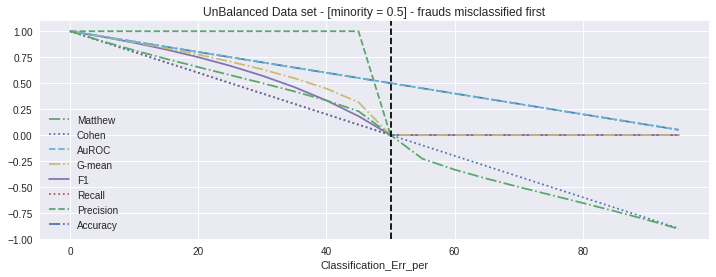

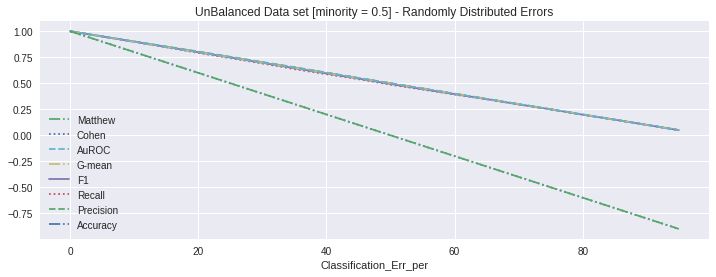

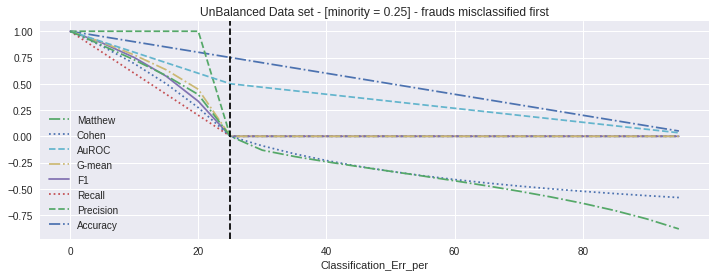

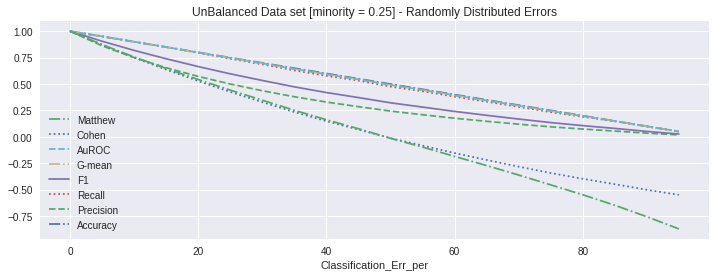

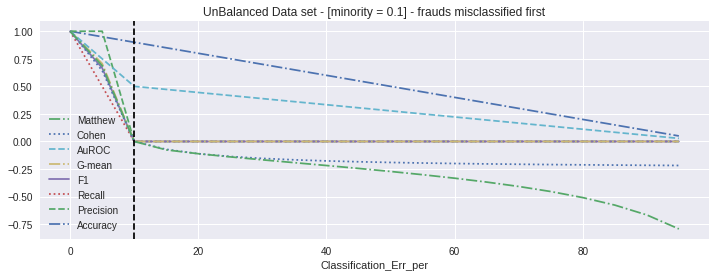

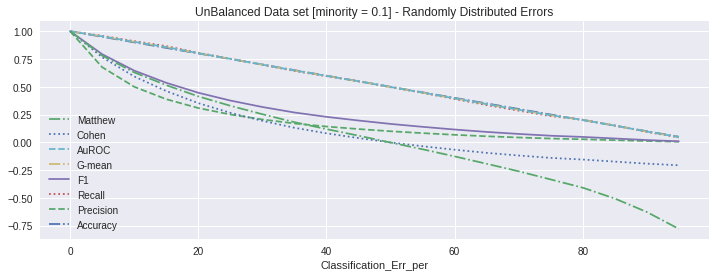

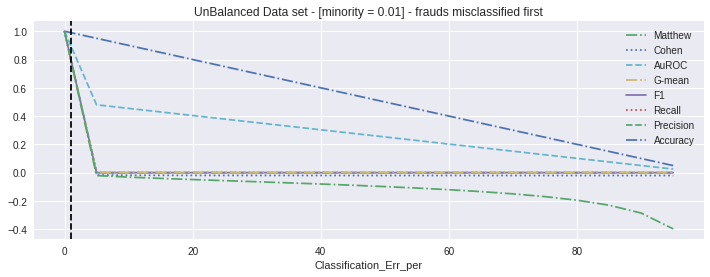

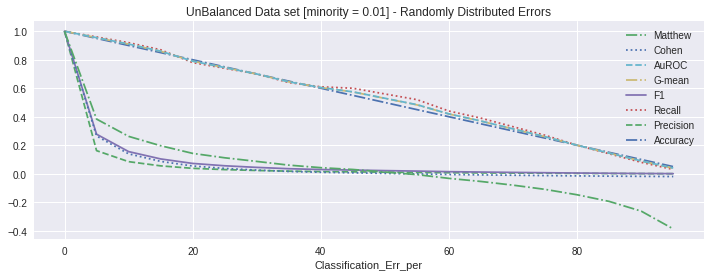

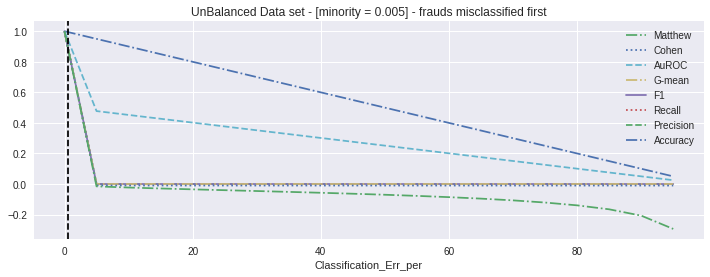

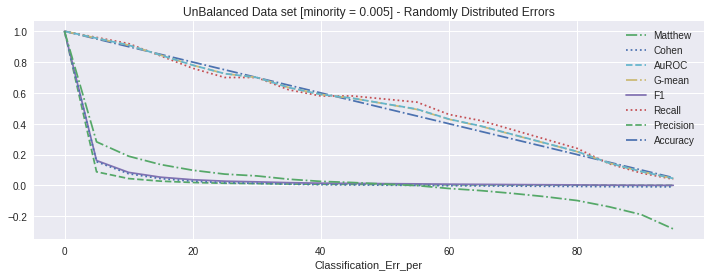

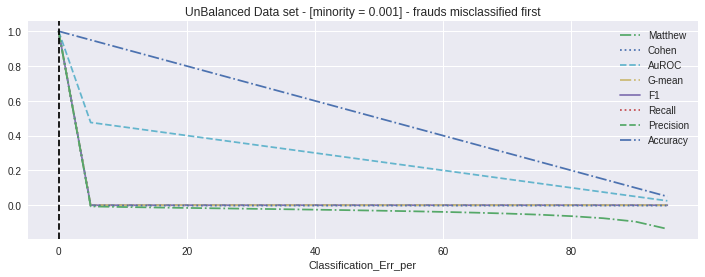

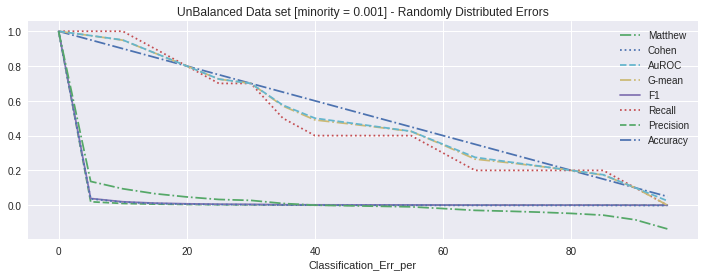

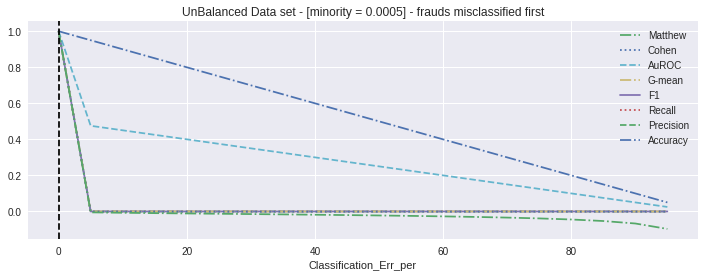

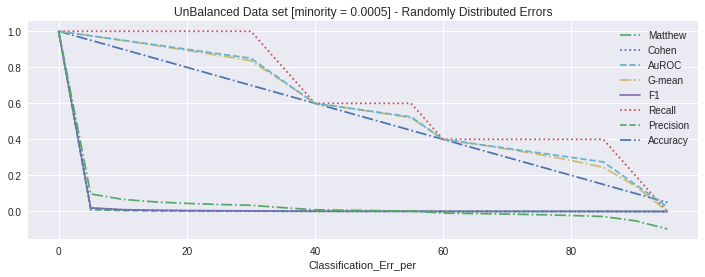

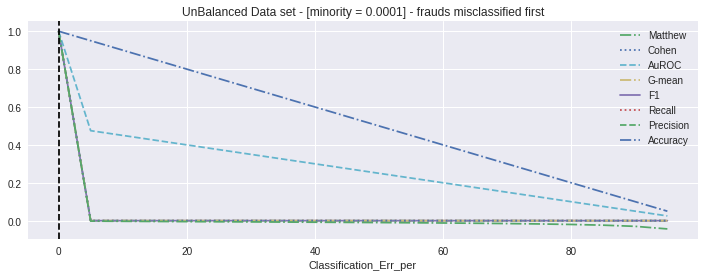

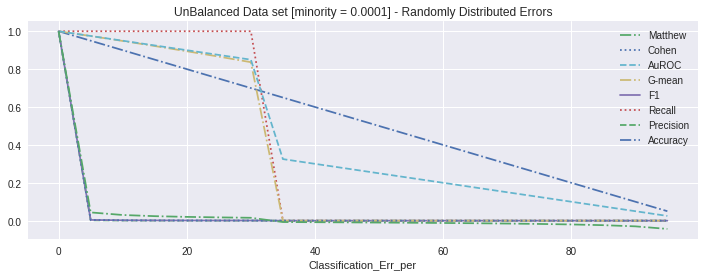

In [5]:
from google.colab import files
def download_dfResults(df_name, csv_name):
  df_name.to_csv(csv_name)
  files.download(csv_name)
  
first = True

#for minority in [0.5, 0.1, 0.01, 0.001, 0.0001 ]:
for minority in [0.5, 0.25, 0.1, 0.01, 0.005, 0.001, 0.0005, 0.0001 ]:
  #print(minority)
  df_sorted, df_random = show_graphs_for_minority(minority, True, True)
  df_sorted['fraud_frac'] = minority
  df_random['fraud_frac'] = minority
  df_sorted['type'] = 'sorted'
  df_random['type'] = 'random'
  if first:
    first = False
    df_sorted_main = df_sorted
    df_random_main = df_random
  else:
    df_sorted_main = df_sorted_main.append(df_sorted)
    df_random_main = df_random_main.append(df_random)
    
df_all = df_sorted_main.append(df_random_main)

download_dfResults(df_all, 'df_all_eval_20step.csv')
#df_random_main.head()

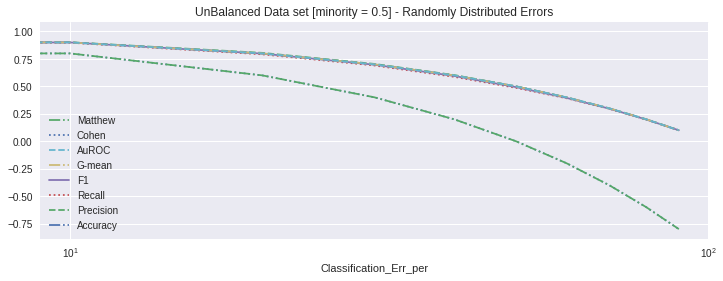

In [9]:
df_s, df_r = show_graphs_for_minority(0.5, False, True, logx=True, logy=False)
#df_r.head(15)

In [0]:
for minority_100 in range(50, 0, -10):
  minority_fract = minority_100/100.0
  #print(minority_fract)
  #show_graphs_for_minority(minority_fract, False, True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


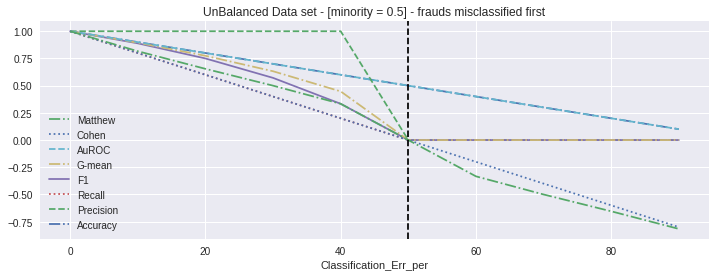

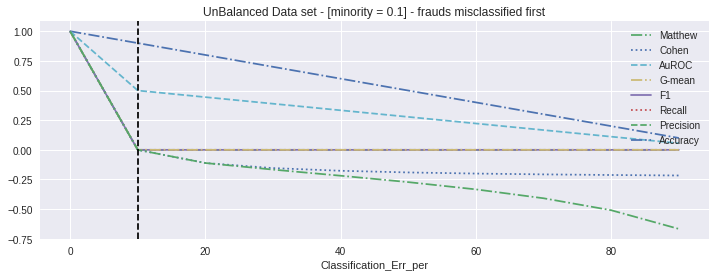

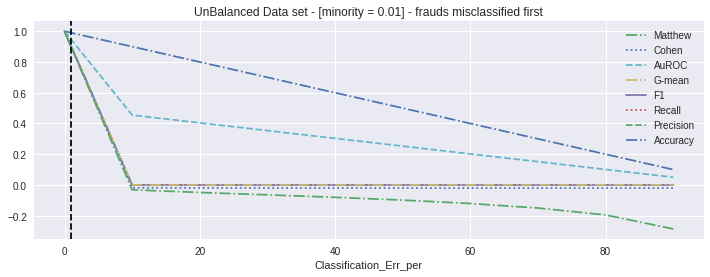

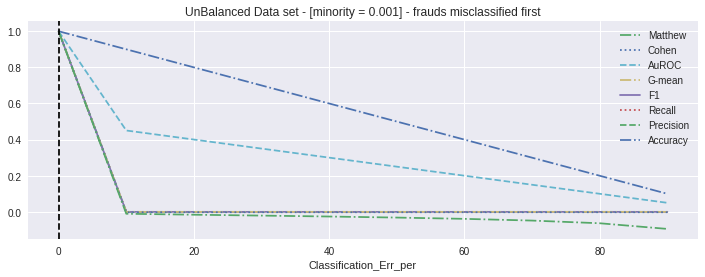

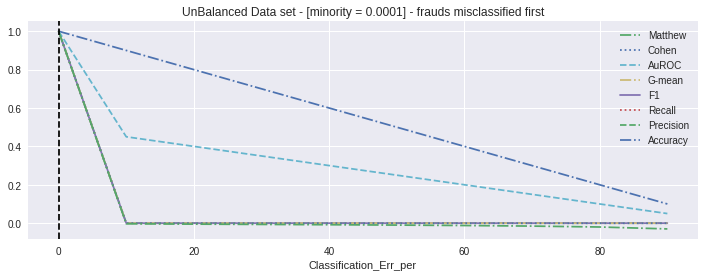

In [15]:
for minority in [0.5, 0.1, 0.01, 0.001, 0.0001 ]:
  #print(minority)
  show_graphs_for_minority(minority, True, False)

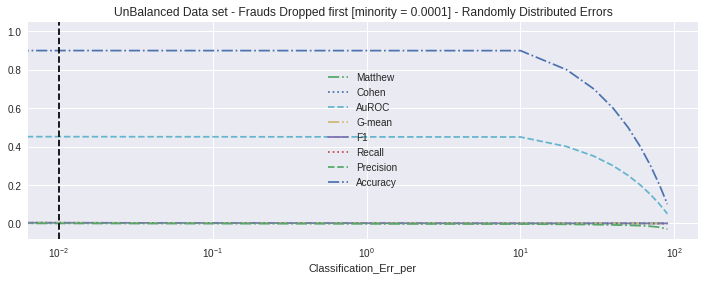

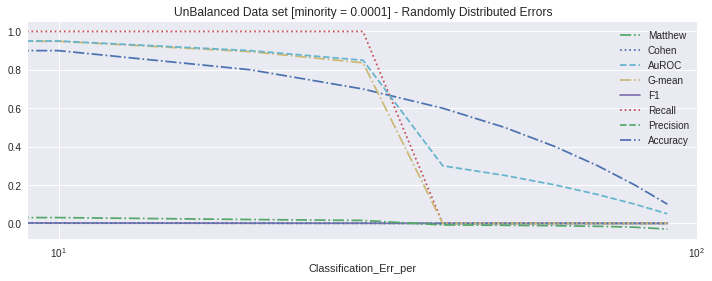

In [11]:
#for minority in [0.5, 0.1, 0.01, 0.001, 0.0001 ]:
#print(minority)
s,r = show_graphs_for_minority(0.0001, True, True, logx=True, logy=False)

In [0]:
show_graphs_for_minority(0.01)

In [0]:
show_graphs_for_minority(0.002)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


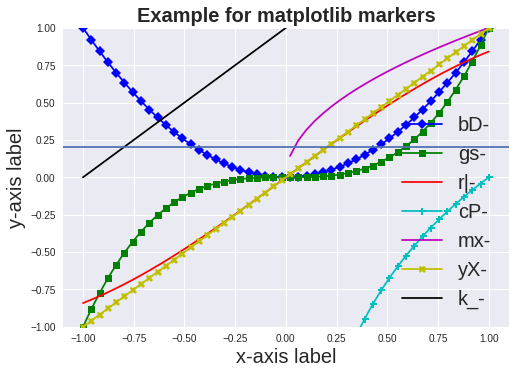

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Get colors / markers / functions
colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k')
markers = []
for m in Line2D.markers:
    try:
        if len(m) == 1 and m != ' ':
            markers.append(m)
    except TypeError:
        pass

f1 = lambda xs: [x**2 for x in xs]
f2 = lambda xs: [x**3 for x in xs]
f3 = lambda xs: np.sin(xs)
f4 = lambda xs: np.log(xs)
f5 = lambda xs: [x**0.5 for x in xs]
f6 = lambda xs: [x for x in xs]
f7 = lambda xs: [x + 1 for x in xs]
functions = [f1, f2, f3, f4, f5, f6, f7]

# Define the plot
plt.ylim(-1.0, 1.0)
plt.title(u"Example for matplotlib markers", fontweight='bold', fontsize=20)
plt.xlabel(r"""x-axis label""", fontsize=20)
plt.ylabel(r"""y-axis label""", fontsize=20)

# Define at which x positions to evaluate the functions f_i(x)
xmin = -1
xmax = 1
samples = 50
xs = np.linspace(xmin, xmax, samples)

# Plot the functions
for color, marker, f in zip(colors, markers, functions):
    format_str = "{color}{marker}-".format(color=color, marker=marker)
    plt.plot(xs, f(xs), format_str, label=format_str)

plt.axhline(y=0.20)
plt.legend(fontsize=20)

plt.savefig("matplotlib-marker-styles.png")  # or plt.show()